In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [2]:
dataset.shape

(2919, 13)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [4]:
## segregate numerical and categorical column
Numerical_columns = dataset.columns[dataset.dtypes != "object"]
Categorical_columns = dataset.columns[dataset.dtypes == "object"]
print("Numerical_column",Numerical_columns)
print("Categorical_columns",Categorical_columns)

Numerical_column Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')
Categorical_columns Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


# EDA Process

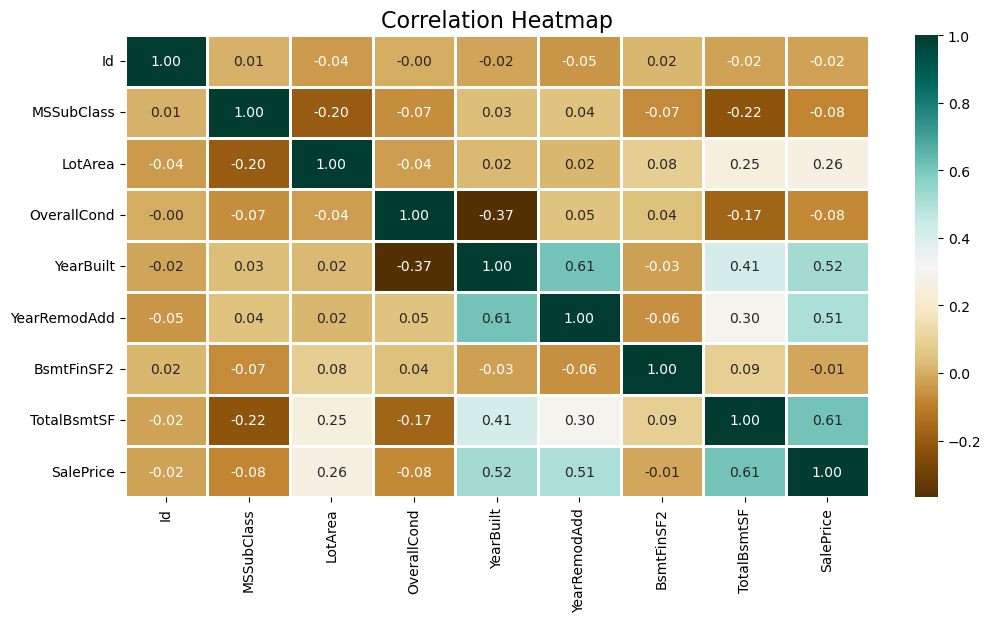

In [5]:
# check the correlation analysis of each column of numerical
# Compute the correlation matrix
#corr_matrix = dataset[Numerical_columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(
    dataset[Numerical_columns].corr(),
    cmap='BrBG',        # Use the BrBG colormap
    fmt='.2f',          # Format for annotations
    linewidths=2,       # Line width between cells
    annot=True          # Annotate each cell with its value
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<Axes: title={'center': 'No. Unique values of Categorical Featres'}, xlabel='None'>

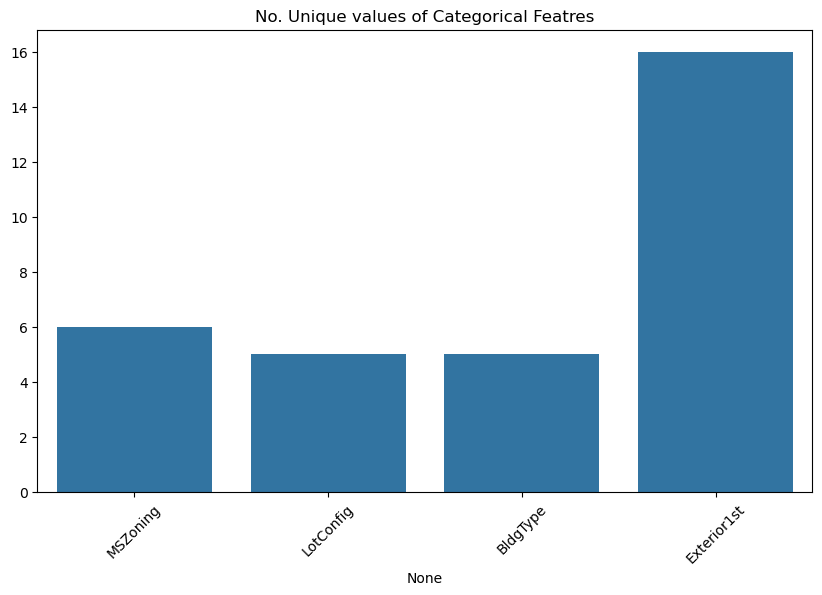

In [6]:
unique_value=[]
for col in Categorical_columns:
    unique_value.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("No. Unique values of Categorical Featres")
plt.xticks(rotation=45)
sns.barplot(x=Categorical_columns,y=unique_value)

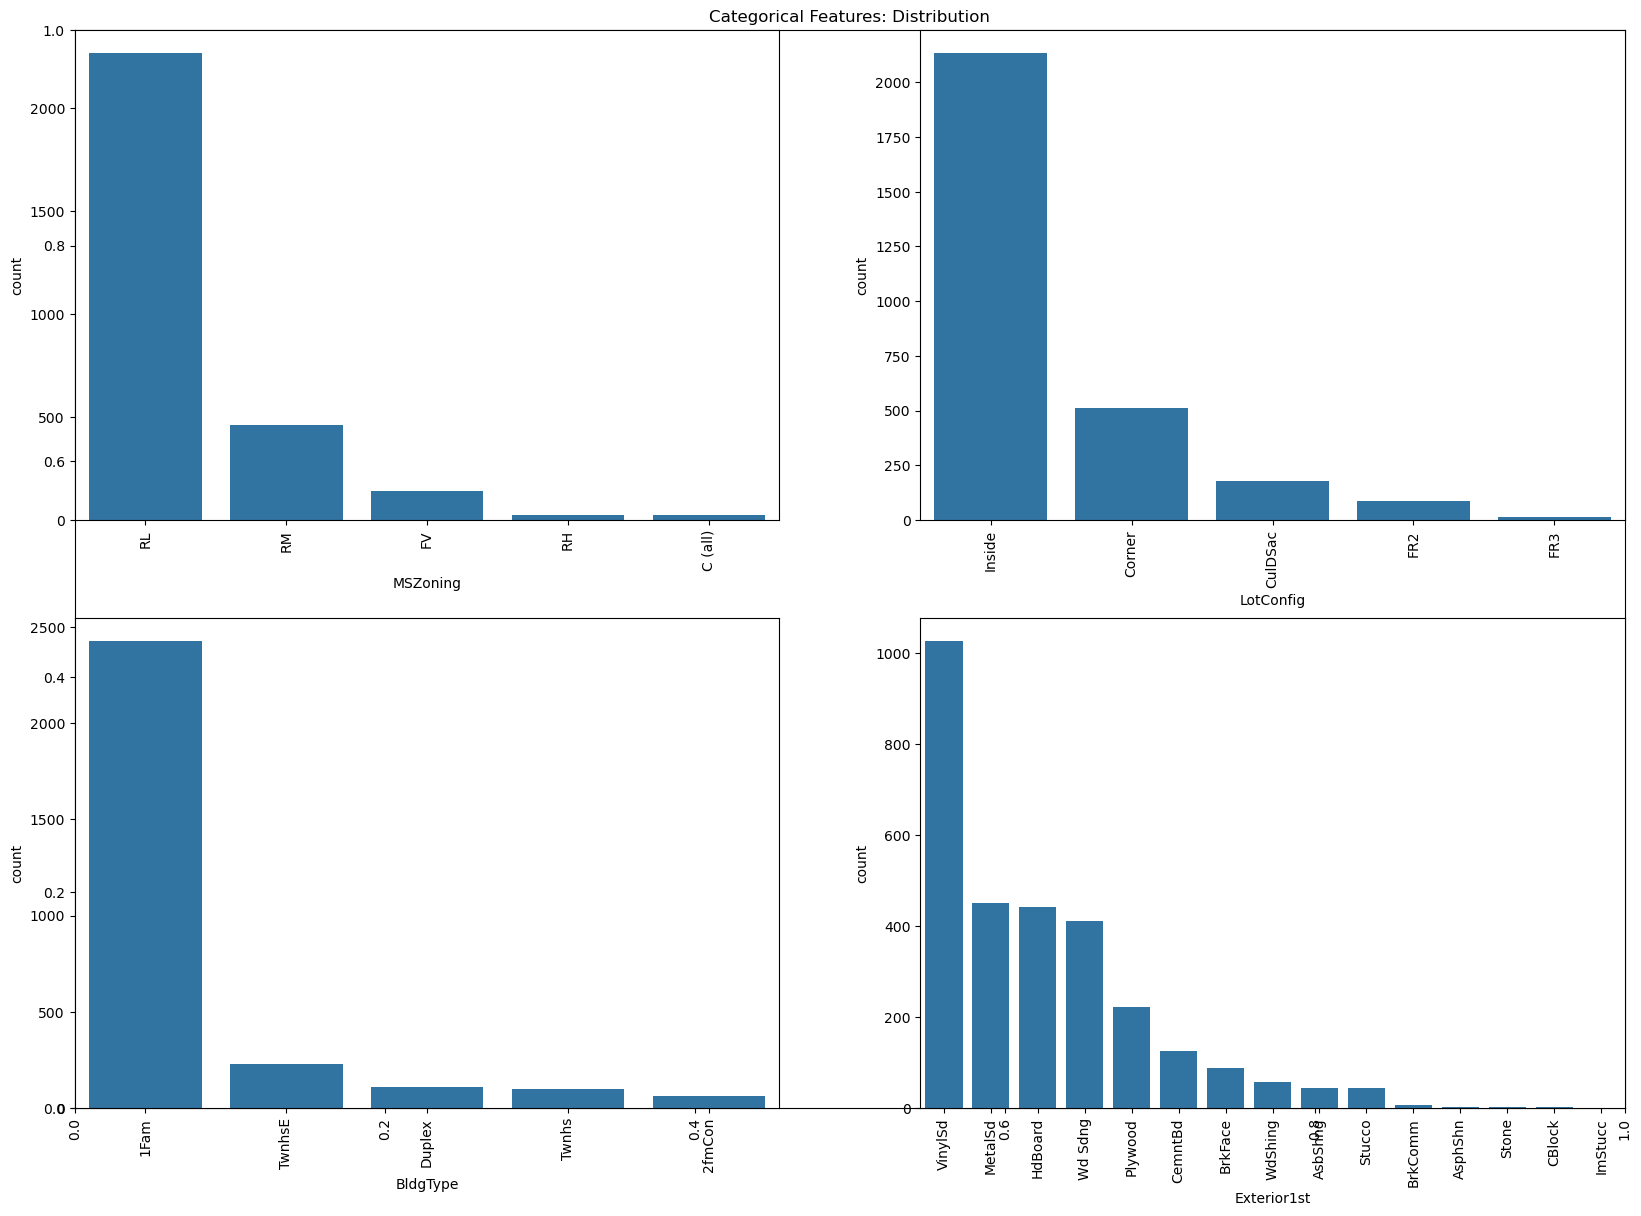

In [7]:
plt.figure(figsize=(20,14))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in Categorical_columns:
    y = dataset[col].value_counts()
    plt.subplot(2, 2, index)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

# Data Cleaning

In [8]:
dataset.head(2)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0


In [9]:
dataset.drop(["Id"],axis=1,inplace = True)
dataset.head(2)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0


In [10]:
dataset.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [11]:
dataset["SalePrice"].isnull().value_counts()

SalePrice
False    1460
True     1459
Name: count, dtype: int64

<Axes: >

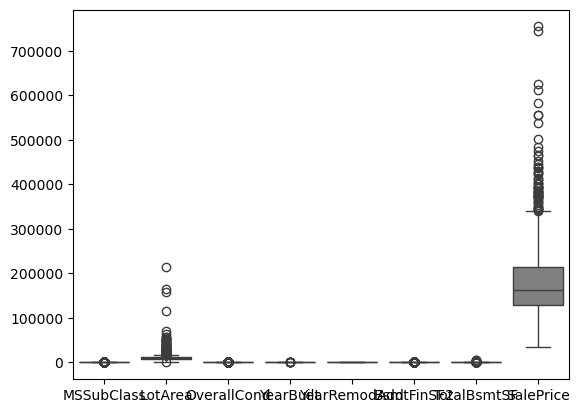

In [12]:
sns.boxplot(dataset)

In [13]:
dataset["SalePrice"].fillna(dataset["SalePrice"].mean())

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
2914    180921.19589
2915    180921.19589
2916    180921.19589
2917    180921.19589
2918    180921.19589
Name: SalePrice, Length: 2919, dtype: float64

In [14]:
dataset["SalePrice"].isnull().value_counts()

SalePrice
False    1460
True     1459
Name: count, dtype: int64

In [15]:
dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [16]:
new_dataset = dataset.dropna()

In [17]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## OneHotEncoder – For Label categorical features

In [18]:
from sklearn.preprocessing import OneHotEncoder
s = new_dataset.dtypes == 'object'
object_cols = list(s[s].index)
print("Categorical variables")
print(object_cols)
print("No of categorical features: ",len(object_cols))

Categorical variables
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No of categorical features:  4


In [19]:
print(new_dataset["MSZoning"].value_counts())
print(new_dataset["LotConfig"].value_counts())
print(new_dataset["BldgType"].value_counts())
print(new_dataset["Exterior1st"].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each of the categorical columns
for col in object_cols:
    new_dataset[col] = label_encoder.fit_transform(new_dataset[col])

# Print the updated dataset
print(new_dataset)

# If you want to concatenate the encoded columns to the original dataset:
df_final = new_dataset  # Since LabelEncoding modifies the original columns directly
print(df_final)


      MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0             60         3     8450          4         0            5   
1             20         3     9600          2         0            8   
2             60         3    11250          4         0            5   
3             70         3     9550          0         0            5   
4             60         3    14260          2         0            5   
...          ...       ...      ...        ...       ...          ...   
1455          60         3     7917          4         0            5   
1456          20         3    13175          4         0            6   
1457          70         3     9042          4         0            9   
1458          20         3     9717          4         0            6   
1459          20         3     9937          4         0            6   

      YearBuilt  YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0          2003          2003           12

C:\Users\SHREE\AppData\Local\Temp\ipykernel_6960\4044971826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[col] = label_encoder.fit_transform(new_dataset[col])
C:\Users\SHREE\AppData\Local\Temp\ipykernel_6960\4044971826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[col] = label_encoder.fit_transform(new_dataset[col])
C:\Users\SHREE\AppData\Local\Temp\ipykernel_6960\4044971826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [124]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
print(OH_cols)
print("###########################")
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
print(df_final)

       0    1    2    3    4    5    6    7    8    9   ...   20   21   22  \
0     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1455  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1456  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1457  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
1458  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1459  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   

       23   24   25   26   27   28   29  
0     0.0  0.0  0.0  

## Splitting Dataset into Training and Testing

In [21]:
df_final["Exterior1st_MetalSd"].value_counts()

KeyError: 'Exterior1st_MetalSd'

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [23]:
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

## Model and Accuracy

In [24]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.3009640201854361


In [25]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.13698384576972175

In [26]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.21277445961381686


In [27]:
# This code is contributed by @amartajisce
!pip install catboost # install the catboost package
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Learning rate set to 0.04196
0:	learn: 76537.8207516	total: 174ms	remaining: 2m 53s
1:	learn: 74937.6747399	total: 181ms	remaining: 1m 30s
2:	learn: 73327.0102578	total: 187ms	remaining: 1m 2s
3:	learn: 71804.2184575	total: 193ms	remaining: 48.1s
4:	learn: 70131.6871033	total: 201ms	remaining: 40s
5:	learn: 68696.5694208	total: 207ms	remaining: 34.4s
6:	learn: 67339.2133885	total: 213ms	remaining: 30.2s
7:	learn: 65938.4928177	total: 219ms	remaining: 27.1s
8:	learn: 64752.1807799	total: 225ms	remaining: 24.7s
9:	learn: 63487.5245609	total: 231ms	remaining: 22.8s
10:	learn: 62318.6082297	total: 236ms	remaining: 21.2s
11:	learn: 61229.2811760	total: 242ms	remaining: 19.9s
12:	learn: 59978.3572927	total: 247ms	remaining: 18.8s
13:	learn: 58944.8308670	total: 253ms	remaining: 17.8s
14:	learn: 57980.2325574	total: 259ms	remaining: 17s
15:	learn: 57058.1381197	total: 264ms	remaining: 16.3s
16:	learn: 56142.5684052	

0.8069049030913645

# Conclusion
Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used